In [101]:
import pandas as pd



In [102]:
carData = pd.read_csv('cars.csv') 
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [103]:
#create a sns.heatmap for the correlation between different features in the car dataset.
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numeric columns only
corr = carData.corr(numeric_only=True)


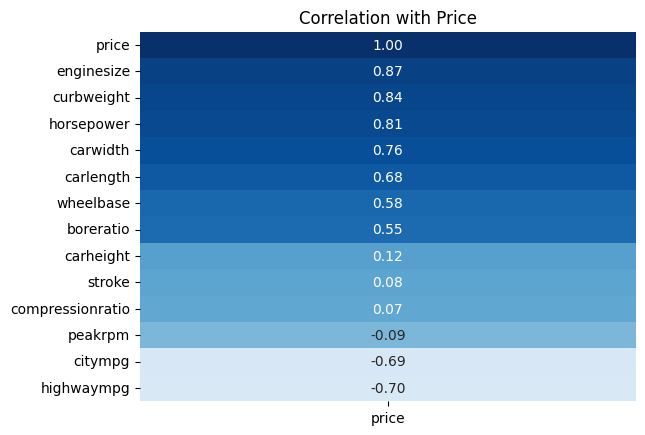

In [104]:
# A heatmap for the correlations with price
numeric_cols = ["wheelbase","carlength","carwidth","carheight","curbweight",
"enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm",
"citympg","highwaympg","price"]

sns.heatmap(data=carData[numeric_cols].corr()
[["price"]].sort_values('price', ascending=False),
annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')
plt.title('Correlation with Price')
plt.show()

In [105]:
# How to create a linear regression model
# Import the LinearRegression class and the train_test_split() function
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Split the data into the training and test datasets
x_train, x_test, y_train, y_test = \
train_test_split(carData[['enginesize']],
carData[['price']], test_size=0.20, random_state=20)

# Step 2: Create the model from the training dataset
model = LinearRegression()
model.fit(x_train, y_train)

# Step 3: Score the model with the test dataset
score = model.score(x_test, y_test)
print(f"Model Score (R²): {score}")
print(f"Model Score (R²): {score:.4f}")

# Additional model information
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")
print(f"This means: Price = {model.coef_[0][0]:.2f} * enginesize + {model.intercept_[0]:.2f}")

Model Score (R²): 0.7063964117029844
Model Score (R²): 0.7064
Intercept: -7982.09
Coefficient: 168.29
This means: Price = 168.29 * enginesize + -7982.09


In [106]:
y_predicted = model.predict(x_test)

In [107]:
predicted = pd.DataFrame(y_predicted,
columns=['predictedPrice'])

final = predicted.join([x_test.reset_index(drop=True),
y_test.reset_index(drop=True)])
final[['enginesize','price','predictedPrice']].head()

,enginesize,price,predictedPrice
0,136,15250.0,14905.920686
1,90,8916.5,7164.387613
2,92,8778.0,7500.976007
3,203,31400.5,26181.631901
4,92,6488.0,7500.976007


In [108]:
final['residual'] = final['price'] - final['predictedPrice']
final.head(2)

,predictedPrice,enginesize,price,residual
0,14905.920686,136,15250.0,344.079314
1,7164.387613,90,8916.5,1752.112387


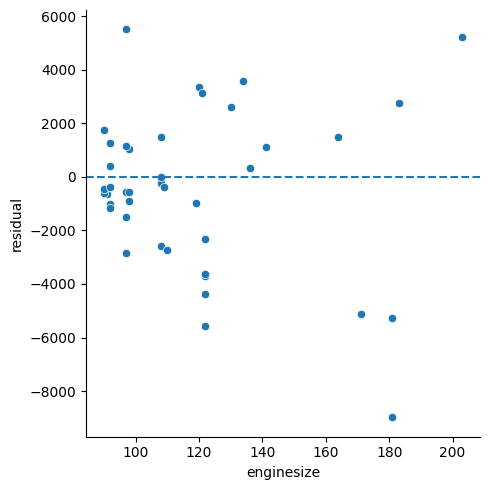

In [109]:
g = sns.relplot(data=final, x='enginesize', y='residual')
for ax in g.axes.flat:
	ax.axhline(0, ls='--')

<Axes: xlabel='residual', ylabel='Density'>

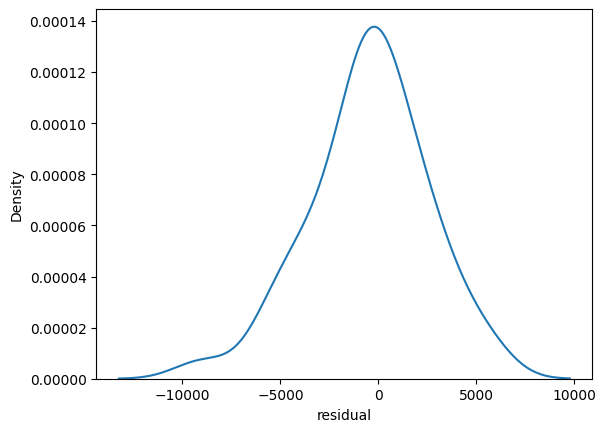

In [110]:
sns.kdeplot(data=final, x='residual')

In [111]:
x_train, x_test, y_train, y_test = train_test_split(carData[['enginesize','curbweight']],carData[['price']], test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.7581072748679533

In [112]:
model.score(x_train, y_train)

0.7950435284247739

In [113]:
y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted,
columns=['predictedPrice'])

final = predicted.join([x_test.reset_index(drop=True),
y_test.reset_index(drop=True)])
final.head()[['enginesize','curbweight','price',
'predictedPrice']]

,enginesize,curbweight,price,predictedPrice
0,136,2507,15250.0,14186.974331
1,90,1874,8916.5,5681.243299
2,92,3110,8778.0,12256.116157
3,203,3366,31400.5,26252.387995
4,92,2015,6488.0,6633.723732


In [114]:
final['residual'] = final['price'] - final['predictedPrice']
final.head()

,predictedPrice,enginesize,curbweight,price,residual
0,14186.974331,136,2507,15250.0,1063.025669
1,5681.243299,90,1874,8916.5,3235.256701
2,12256.116157,92,3110,8778.0,-3478.116157
3,26252.387995,203,3366,31400.5,5148.112005
4,6633.723732,92,2015,6488.0,-145.723732


<Axes: xlabel='residual', ylabel='Density'>

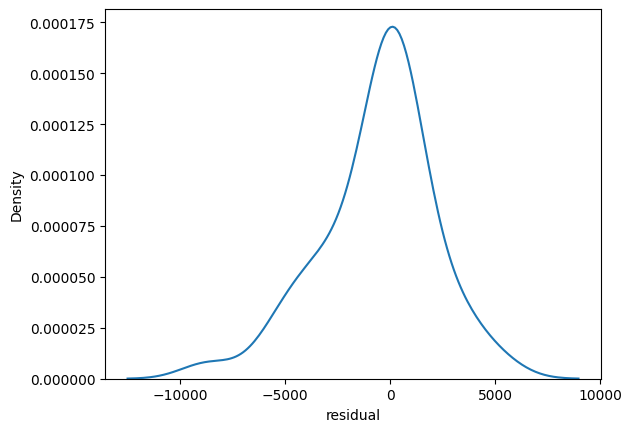

In [115]:
sns.kdeplot(data=final, x='residual')

In [ ]:
# THREE VARIABLE MODEL: Adding horsepower as the 3rd variable
x_train, x_test, y_train, y_test = train_test_split(carData[['enginesize','curbweight','horsepower']],
                                                    carData[['price']], test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

print("Three Variable Model Results:")
print(f"Test Score (R²): {model.score(x_test, y_test):.4f}")
print(f"Train Score (R²): {model.score(x_train, y_train):.4f}")

Three Variable Model Results:
Test Score (R²): 0.7671
Train Score (R²): 0.8151


In [ ]:
y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])
final = predicted.join([x_test.reset_index(drop=True),
y_test.reset_index(drop=True)])
final.head()[['enginesize','curbweight','horsepower','price',
'predictedPrice']]

,enginesize,curbweight,horsepower,price,predictedPrice
0,136,2507,110,15250.0,14269.804310
1,90,1874,70,8916.5,5545.030936
2,92,3110,62,8778.0,10369.742045
3,203,3366,288,31400.5,33214.004887
4,92,2015,62,6488.0,5863.082350


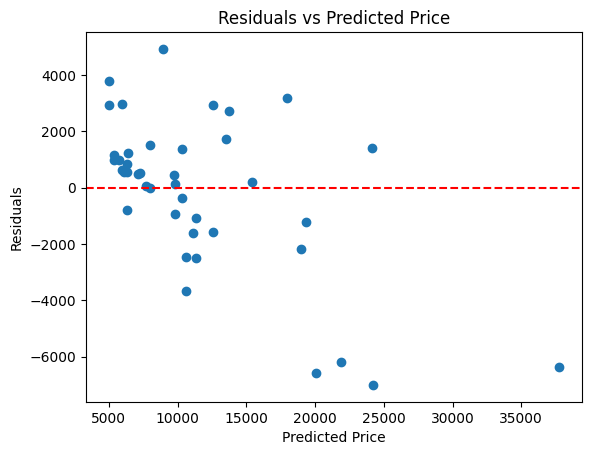

In [160]:
final['residual'] = final['price'] - final['predictedPrice']
import matplotlib.pyplot as plt
plt.scatter(final['predictedPrice'], final['residual'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()

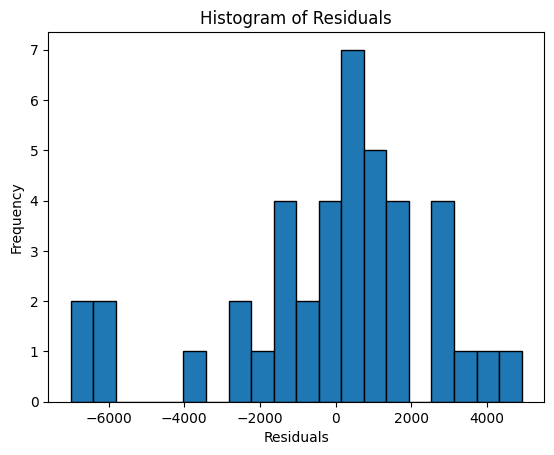

In [ ]:

plt.hist(final['residual'], bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()  

In [118]:
# Predictions for three variable model
y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted,
columns=['predictedPrice'])

final = predicted.join([x_test.reset_index(drop=True),
y_test.reset_index(drop=True)])
final.head()[['enginesize','curbweight','horsepower','price',
'predictedPrice']]

,enginesize,curbweight,horsepower,price,predictedPrice
0,136,2507,110,15250.0,14269.804310
1,90,1874,70,8916.5,5545.030936
2,92,3110,62,8778.0,10369.742045
3,203,3366,288,31400.5,33214.004887
4,92,2015,62,6488.0,5863.082350


In [119]:
# Residuals for three variable model
final['residual'] = final['price'] - final['predictedPrice']
final.head()



,predictedPrice,enginesize,curbweight,horsepower,price,residual
0,14269.804310,136,2507,110,15250.0,980.195690
1,5545.030936,90,1874,70,8916.5,3371.469064
2,10369.742045,92,3110,62,8778.0,-1591.742045
3,33214.004887,203,3366,288,31400.5,-1813.504887
4,5863.082350,92,2015,62,6488.0,624.917650


In [120]:
carData.enginelocation.value_counts()
carData.fueltype.value_counts()
carData.aspiration.value_counts()
carData.doornumber.value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [121]:
carData.fuelsystem.value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [122]:
carsData = carData.copy()
carsData.carbody.value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [123]:
carsData.drivewheel.value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [124]:
carsData.enginetype.value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [125]:
carsData.cylindernumber.value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: count, dtype: int64

In [126]:
catColumns = ['aspiration','doornumber','carbody','drivewheel']
dummies = pd.get_dummies(carsData[catColumns])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   aspiration_std       205 non-null    bool 
 1   aspiration_turbo     205 non-null    bool 
 2   doornumber_four      205 non-null    bool 
 3   doornumber_two       205 non-null    bool 
 4   carbody_convertible  205 non-null    bool 
 5   carbody_hardtop      205 non-null    bool 
 6   carbody_hatchback    205 non-null    bool 
 7   carbody_sedan        205 non-null    bool 
 8   carbody_wagon        205 non-null    bool 
 9   drivewheel_4wd       205 non-null    bool 
 10  drivewheel_fwd       205 non-null    bool 
 11  drivewheel_rwd       205 non-null    bool 
dtypes: bool(12)
memory usage: 2.5 KB


In [127]:
carsDummies = carsData.drop(columns=catColumns)
carsDummies = carsDummies.join(dummies)
carsDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    object 
 4   enginelocation       205 non-null    object 
 5   wheelbase            205 non-null    float64
 6   carlength            205 non-null    float64
 7   carwidth             205 non-null    float64
 8   carheight            205 non-null    float64
 9   curbweight           205 non-null    int64  
 10  enginetype           205 non-null    object 
 11  cylindernumber       205 non-null    object 
 12  enginesize           205 non-null    int64  
 13  fuelsystem           205 non-null    object 
 14  boreratio            205 non-null    float64
 15  stroke               205 non-null    flo

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numCols = ['wheelbase','carlength','carwidth','carheight','curbweight',
'enginesize','boreratio','stroke','compressionratio',
'horsepower','peakrpm','citympg','highwaympg']
carsDummies[numCols] = scaler.fit_transform(carsDummies[numCols])
carsDummies.head()

,car_ID,symboling,CarName,fueltype,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,3,alfa-romero giulia,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,False,True,True,False,False,False,False,False,False,True
1,2,3,alfa-romero stelvio,gas,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,...,False,True,True,False,False,False,False,False,False,True
2,3,1,alfa-romero Quadrifoglio,gas,front,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,...,False,True,False,False,True,False,False,False,False,True
3,4,2,audi 100 ls,gas,front,0.173698,0.207256,0.136542,0.235942,-0.420797,...,True,False,False,False,False,True,False,False,True,False
4,5,2,audi 100ls,gas,front,0.107110,0.207256,0.230001,0.235942,0.516807,...,True,False,False,False,False,True,False,True,False,False


In [129]:
# Select only numeric and boolean columns for correlation
corr_cols = carsDummies.select_dtypes(include=['number', 'bool'])
corr_cols.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
drivewheel_rwd,0.638957
wheelbase,0.577816
boreratio,0.553173
carbody_hardtop,0.225854


In [130]:
#How to create a multiple linear regression model
carsTrain, carsTest = train_test_split(carsDummies, test_size=0.2,
random_state=20)

model = LinearRegression()
xCols = ['enginesize','horsepower','carwidth',
'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [131]:
model.score(carsTest[xCols], carsTest['price'])

0.7523820020019687

In [132]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8334860355280258

In [133]:
y_predicted = model.predict(carsTest[xCols])

In [134]:
predicted = pd.DataFrame(y_predicted,
columns=['predictedPrice'])
final = predicted.join([carsTest[xCols].reset_index(drop=True),
carsTest['price'].reset_index(drop=True)])
final[['enginesize','horsepower','carwidth','drivewheel_rwd','highwaympg','price','predictedPrice']].head()

,enginesize,horsepower,carwidth,drivewheel_rwd,highwaympg,price,predictedPrice
0,0.218885,0.149133,0.183272,False,-0.837195,15250.0,13517.858822
1,-0.888455,-0.864871,-1.078431,False,1.783034,8916.5,5968.304606
2,-0.840310,-1.067671,-1.078431,False,0.181783,8778.0,4984.725918
3,1.831749,4.661448,2.987056,True,-0.400490,31400.5,37778.843127
4,-0.840310,-1.067671,-1.078431,False,1.055193,6488.0,5347.966676


<Axes: >

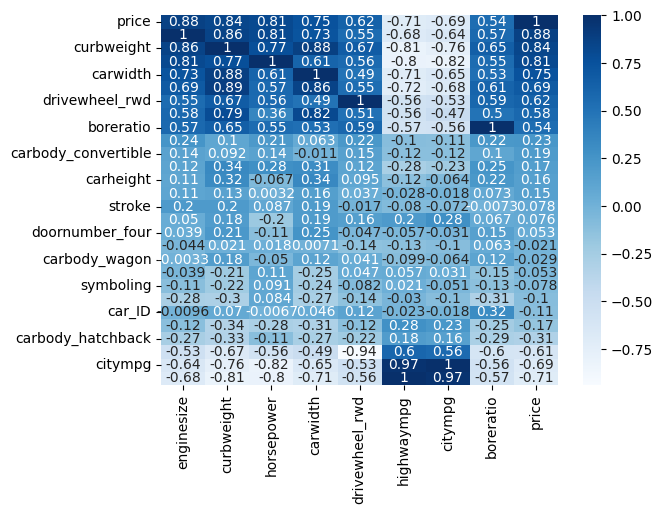

In [135]:
# Select only numeric columns for correlation
numeric_cols = carsTrain.select_dtypes(include=['number', 'bool']).columns

sns.heatmap(
	carsTrain[numeric_cols].corr()[[
		'enginesize','curbweight','horsepower',
		'carwidth','drivewheel_rwd','highwaympg','citympg','boreratio',
		'price'
	]].sort_values(by='price', ascending=False),
	cmap='Blues', annot=True
)

In [136]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth',
'carlength','drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.7430944903647659

In [137]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8339017954221501

In [138]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth',
'carlength','drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])



0.7430944903647659

In [139]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8339017954221501

In [140]:
model = LinearRegression()
xCols = [col for col in numeric_cols if col != 'price']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.7741309452324638

In [141]:
model.score(carsTrain[xCols], carsTrain['price'])

0.893488927713899

In [142]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

carsTrain, carsTest = train_test_split(carsDummies.drop(
columns=['CarName','fueltype','enginelocation',
'cylindernumber','fuelsystem','enginetype']),
test_size=0.2, random_state=20)

In [143]:
fs = SelectKBest(score_func=mutual_info_regression, k=20)
fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

,score_func,<function mut...0025C88104400>
,k,20


In [144]:
x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
x_test_fs = fs.transform(carsTest.drop(columns=['price']))

In [145]:
model = LinearRegression()
model.fit(x_train_fs, carsTrain['price'])
model.score(x_test_fs, carsTest['price'])

0.7730268917681576

In [146]:
model.score(x_train_fs, carsTrain['price'])

0.8826996202377456

In [147]:
df1 = pd.DataFrame(carsTrain.drop(columns=['price']).columns,
columns=['feature'])
df2 = pd.DataFrame(fs.scores_, columns=['importance'])
importance = df1.join(df2)
importance.sort_values('importance', ascending=False).head()

,feature,importance
6,curbweight,0.903948
11,horsepower,0.884552
14,highwaympg,0.861831
7,enginesize,0.848997
13,citympg,0.734449


In [148]:
model = LinearRegression()
testScores = []
trainScores = []
for i in range(1, len(carsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])
    x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
    x_test_fs = fs.transform(carsTest.drop(columns=['price']))
    model.fit(x_train_fs, carsTrain['price'])
    testScore = model.score(x_test_fs, carsTest['price'])
    trainScore = model.score(x_train_fs, carsTrain['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)

<Axes: xlabel='numFeatures'>

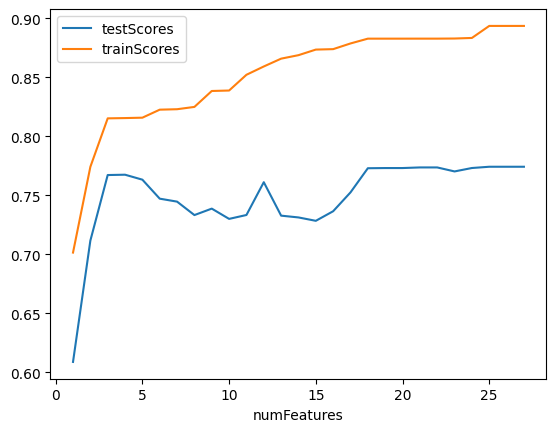

In [149]:
df = pd.DataFrame(data={'testScores':testScores,
'trainScores':trainScores})
df = df.reset_index()
df = df.rename(columns={'index':'numFeatures'})
df['numFeatures'] = df['numFeatures'] + 1
df.plot(x='numFeatures', y=['testScores','trainScores'])

# Chapter 11: Expanding Multiple Regression Analysis
## Adding a Third Variable to Improve Prediction Accuracy

Based on the correlation analysis above, we'll systematically compare:
1. **Single Variable Model**: enginesize only
2. **Two Variable Model**: enginesize + curbweight (as shown in slides)
3. **Three Variable Model**: enginesize + curbweight + horsepower (adding 3rd variable)

This will help us determine if adding more variables improves our model's predictive power.

In [150]:
# Step 1: Prepare the data (using the original carData for clearer interpretation)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Use the original data for better interpretability
X = carData[['enginesize', 'curbweight', 'horsepower']].copy()
y = carData['price'].copy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset prepared:")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Features: {list(X.columns)}")
print(f"Target: price")

Dataset prepared:
Training set size: 164
Test set size: 41
Features: ['enginesize', 'curbweight', 'horsepower']
Target: price


In [151]:
# Step 2: Model 1 - Single Variable (enginesize only)
print("="*60)
print("MODEL 1: SINGLE VARIABLE REGRESSION (enginesize)")
print("="*60)

model1 = LinearRegression()
model1.fit(X_train[['enginesize']], y_train)

# Predictions
y_pred1_train = model1.predict(X_train[['enginesize']])
y_pred1_test = model1.predict(X_test[['enginesize']])

# Performance metrics
r2_train1 = model1.score(X_train[['enginesize']], y_train)
r2_test1 = model1.score(X_test[['enginesize']], y_test)
mse1 = mean_squared_error(y_test, y_pred1_test)
mae1 = mean_absolute_error(y_test, y_pred1_test)

print(f"R² (Training): {r2_train1:.4f}")
print(f"R² (Test): {r2_test1:.4f}")
print(f"Mean Squared Error: ${mse1:,.2f}")
print(f"Mean Absolute Error: ${mae1:,.2f}")
print(f"Root Mean Squared Error: ${np.sqrt(mse1):,.2f}")
print(f"Equation: Price = {model1.coef_[0]:.2f} × enginesize + {model1.intercept_:.2f}")

MODEL 1: SINGLE VARIABLE REGRESSION (enginesize)
R² (Training): 0.7507
R² (Test): 0.8041
Mean Squared Error: $15,465,458.97
Mean Absolute Error: $2,748.69
Root Mean Squared Error: $3,932.61
Equation: Price = 165.84 × enginesize + -7741.77


In [152]:
# Step 3: Model 2 - Two Variables (enginesize + curbweight) - From Slides Example
print("\n" + "="*60)
print("MODEL 2: MULTIPLE REGRESSION - TWO VARIABLES (enginesize + curbweight)")
print("="*60)

model2 = LinearRegression()
model2.fit(X_train[['enginesize', 'curbweight']], y_train)

# Predictions
y_pred2_train = model2.predict(X_train[['enginesize', 'curbweight']])
y_pred2_test = model2.predict(X_test[['enginesize', 'curbweight']])

# Performance metrics
r2_train2 = model2.score(X_train[['enginesize', 'curbweight']], y_train)
r2_test2 = model2.score(X_test[['enginesize', 'curbweight']], y_test)
mse2 = mean_squared_error(y_test, y_pred2_test)
mae2 = mean_absolute_error(y_test, y_pred2_test)

print(f"R² (Training): {r2_train2:.4f}")
print(f"R² (Test): {r2_test2:.4f}")
print(f"Mean Squared Error: ${mse2:,.2f}")
print(f"Mean Absolute Error: ${mae2:,.2f}")
print(f"Root Mean Squared Error: ${np.sqrt(mse2):,.2f}")
print(f"Equation: Price = {model2.coef_[0]:.2f} × enginesize + {model2.coef_[1]:.2f} × curbweight + {model2.intercept_:.2f}")

# Improvement from Model 1 to Model 2
print(f"\nIMPROVEMENT FROM MODEL 1 TO MODEL 2:")
print(f"R² improvement: {r2_test2 - r2_test1:.4f} ({((r2_test2 - r2_test1)/r2_test1)*100:.1f}% increase)")
print(f"MSE reduction: ${mse1 - mse2:,.2f} ({((mse1 - mse2)/mse1)*100:.1f}% decrease)")


MODEL 2: MULTIPLE REGRESSION - TWO VARIABLES (enginesize + curbweight)
R² (Training): 0.7839
R² (Test): 0.8265
Mean Squared Error: $13,699,220.98
Mean Absolute Error: $2,502.52
Root Mean Squared Error: $3,701.25
Equation: Price = 112.75 × enginesize + 5.02 × curbweight + -13866.44

IMPROVEMENT FROM MODEL 1 TO MODEL 2:
R² improvement: 0.0224 (2.8% increase)
MSE reduction: $1,766,237.98 (11.4% decrease)


In [153]:
# Step 4: Model 3 - Three Variables (enginesize + curbweight + horsepower) - NEW EXPANSION
print("\n" + "="*60)
print("MODEL 3: MULTIPLE REGRESSION - THREE VARIABLES (enginesize + curbweight + horsepower)")
print("="*60)

model3 = LinearRegression()
model3.fit(X_train[['enginesize', 'curbweight', 'horsepower']], y_train)

# Predictions
y_pred3_train = model3.predict(X_train[['enginesize', 'curbweight', 'horsepower']])
y_pred3_test = model3.predict(X_test[['enginesize', 'curbweight', 'horsepower']])

# Performance metrics
r2_train3 = model3.score(X_train[['enginesize', 'curbweight', 'horsepower']], y_train)
r2_test3 = model3.score(X_test[['enginesize', 'curbweight', 'horsepower']], y_test)
mse3 = mean_squared_error(y_test, y_pred3_test)
mae3 = mean_absolute_error(y_test, y_pred3_test)

print(f"R² (Training): {r2_train3:.4f}")
print(f"R² (Test): {r2_test3:.4f}")
print(f"Mean Squared Error: ${mse3:,.2f}")
print(f"Mean Absolute Error: ${mae3:,.2f}")
print(f"Root Mean Squared Error: ${np.sqrt(mse3):,.2f}")
print(f"Equation: Price = {model3.coef_[0]:.2f} × enginesize + {model3.coef_[1]:.2f} × curbweight + {model3.coef_[2]:.2f} × horsepower + {model3.intercept_:.2f}")

# Improvement from Model 2 to Model 3
print(f"\nIMPROVEMENT FROM MODEL 2 TO MODEL 3:")
print(f"R² improvement: {r2_test3 - r2_test2:.4f} ({((r2_test3 - r2_test2)/r2_test2)*100:.1f}% increase)")
print(f"MSE reduction: ${mse2 - mse3:,.2f} ({((mse2 - mse3)/mse2)*100:.1f}% decrease)")

# Overall improvement from Model 1 to Model 3
print(f"\nOVERALL IMPROVEMENT FROM MODEL 1 TO MODEL 3:")
print(f"R² improvement: {r2_test3 - r2_test1:.4f} ({((r2_test3 - r2_test1)/r2_test1)*100:.1f}% increase)")
print(f"MSE reduction: ${mse1 - mse3:,.2f} ({((mse1 - mse3)/mse1)*100:.1f}% decrease)")


MODEL 3: MULTIPLE REGRESSION - THREE VARIABLES (enginesize + curbweight + horsepower)
R² (Training): 0.8107
R² (Test): 0.8208
Mean Squared Error: $14,145,734.53
Mean Absolute Error: $2,722.10
Root Mean Squared Error: $3,761.08
Equation: Price = 77.74 × enginesize + 4.26 × curbweight + 53.86 × horsepower + -13131.05

IMPROVEMENT FROM MODEL 2 TO MODEL 3:
R² improvement: -0.0057 (-0.7% increase)
MSE reduction: $-446,513.55 (-3.3% decrease)

OVERALL IMPROVEMENT FROM MODEL 1 TO MODEL 3:
R² improvement: 0.0167 (2.1% increase)
MSE reduction: $1,319,724.43 (8.5% decrease)


In [154]:
# Step 5: Summary Comparison Table
print("\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON SUMMARY")
print("="*80)

# Create comparison dataframe
comparison_data = {
    'Model': ['1-Variable (enginesize)', '2-Variable (+ curbweight)', '3-Variable (+ horsepower)'],
    'Variables Used': [
        'enginesize',
        'enginesize, curbweight',
        'enginesize, curbweight, horsepower'
    ],
    'R² (Test)': [f"{r2_test1:.4f}", f"{r2_test2:.4f}", f"{r2_test3:.4f}"],
    'R² (Train)': [f"{r2_train1:.4f}", f"{r2_train2:.4f}", f"{r2_train3:.4f}"],
    'MSE': [f"${mse1:,.0f}", f"${mse2:,.0f}", f"${mse3:,.0f}"],
    'RMSE': [f"${np.sqrt(mse1):,.0f}", f"${np.sqrt(mse2):,.0f}", f"${np.sqrt(mse3):,.0f}"],
    'MAE': [f"${mae1:,.0f}", f"${mae2:,.0f}", f"${mae3:,.0f}"]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Analysis conclusions
print(f"\n" + "="*80)
print("KEY FINDINGS:")
print("="*80)
print(f"1. Adding curbweight improved R² by {((r2_test2 - r2_test1)/r2_test1)*100:.1f}%")
print(f"2. Adding horsepower further improved R² by {((r2_test3 - r2_test2)/r2_test2)*100:.1f}%")
print(f"3. Overall improvement from 1 to 3 variables: {((r2_test3 - r2_test1)/r2_test1)*100:.1f}% increase in R²")
print(f"4. The 3-variable model explains {r2_test3*100:.1f}% of price variance")

if r2_test3 > r2_test2:
    print(f"5. ✅ CONCLUSION: Adding horsepower as a 3rd variable IMPROVED the model")
else:
    print(f"5. ❌ CONCLUSION: Adding horsepower as a 3rd variable did NOT improve the model")


COMPREHENSIVE MODEL COMPARISON SUMMARY
                    Model                     Variables Used R² (Test) R² (Train)         MSE   RMSE    MAE
  1-Variable (enginesize)                         enginesize    0.8041     0.7507 $15,465,459 $3,933 $2,749
2-Variable (+ curbweight)             enginesize, curbweight    0.8265     0.7839 $13,699,221 $3,701 $2,503
3-Variable (+ horsepower) enginesize, curbweight, horsepower    0.8208     0.8107 $14,145,735 $3,761 $2,722

KEY FINDINGS:
1. Adding curbweight improved R² by 2.8%
2. Adding horsepower further improved R² by -0.7%
3. Overall improvement from 1 to 3 variables: 2.1% increase in R²
4. The 3-variable model explains 82.1% of price variance
5. ❌ CONCLUSION: Adding horsepower as a 3rd variable did NOT improve the model


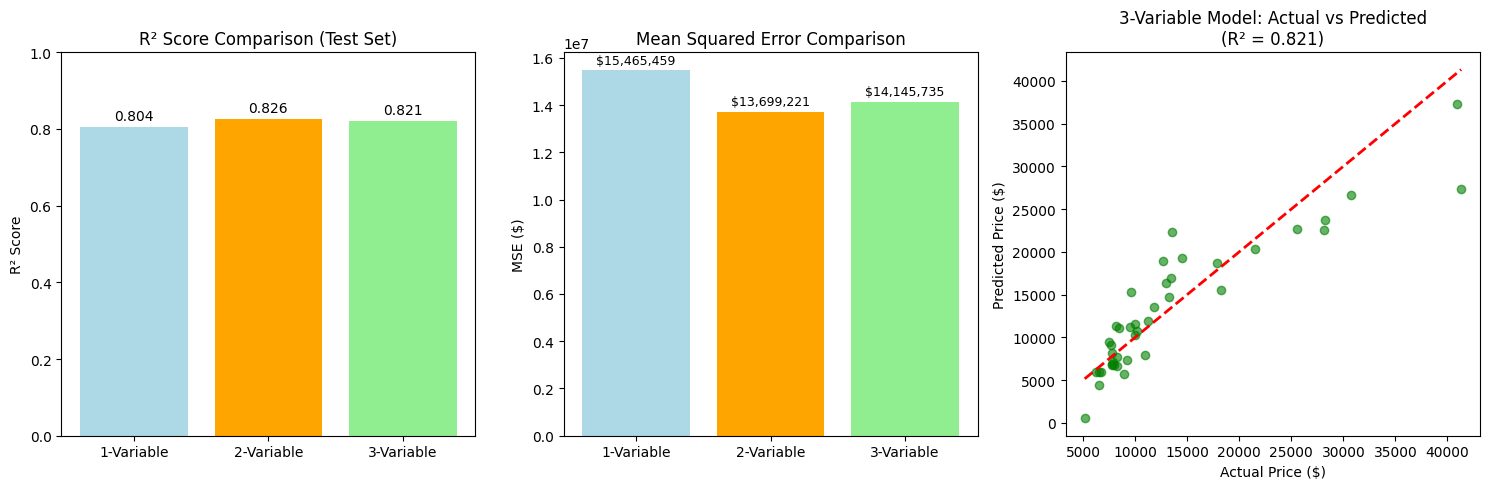

In [155]:
# Step 6: Visual Comparison of Model Performance
plt.figure(figsize=(15, 5))

# Plot 1: R² Comparison
plt.subplot(1, 3, 1)
models = ['1-Variable', '2-Variable', '3-Variable']
r2_scores = [r2_test1, r2_test2, r2_test3]
bars = plt.bar(models, r2_scores, color=['lightblue', 'orange', 'lightgreen'])
plt.title('R² Score Comparison (Test Set)')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{r2_scores[i]:.3f}', ha='center', va='bottom')

# Plot 2: MSE Comparison
plt.subplot(1, 3, 2)
mse_scores = [mse1, mse2, mse3]
bars = plt.bar(models, mse_scores, color=['lightblue', 'orange', 'lightgreen'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('MSE ($)')
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(mse_scores)*0.01, 
             f'${mse_scores[i]:,.0f}', ha='center', va='bottom', fontsize=9)

# Plot 3: Actual vs Predicted for 3-Variable Model
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred3_test, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title(f'3-Variable Model: Actual vs Predicted\n(R² = {r2_test3:.3f})')

plt.tight_layout()
plt.show()

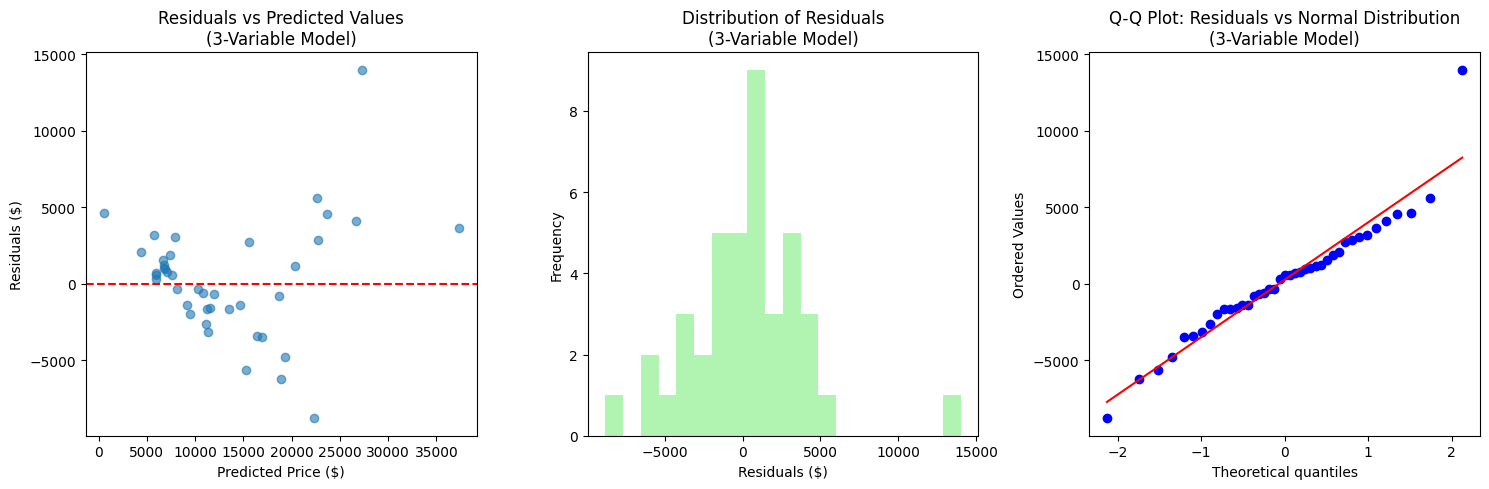

Residual Analysis for 3-Variable Model:
Mean of residuals: $250.89
Standard deviation of residuals: $3,752.70
Min residual: $-8,809.23
Max residual: $14,000.35


In [156]:
# Step 7: Residual Analysis for the 3-Variable Model
plt.figure(figsize=(15, 5))

# Calculate residuals for 3-variable model
residuals3 = y_test - y_pred3_test

# Plot 1: Residuals vs Predicted Values
plt.subplot(1, 3, 1)
plt.scatter(y_pred3_test, residuals3, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residuals vs Predicted Values\n(3-Variable Model)')

# Plot 2: Residuals Distribution
plt.subplot(1, 3, 2)
plt.hist(residuals3, bins=20, alpha=0.7, color='lightgreen')
plt.xlabel('Residuals ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals\n(3-Variable Model)')

# Plot 3: Q-Q Plot for Normality Check
from scipy import stats
plt.subplot(1, 3, 3)
stats.probplot(residuals3, dist="norm", plot=plt)
plt.title('Q-Q Plot: Residuals vs Normal Distribution\n(3-Variable Model)')

plt.tight_layout()
plt.show()

# Additional residual statistics
print(f"Residual Analysis for 3-Variable Model:")
print(f"Mean of residuals: ${np.mean(residuals3):,.2f}")
print(f"Standard deviation of residuals: ${np.std(residuals3):,.2f}")
print(f"Min residual: ${np.min(residuals3):,.2f}")
print(f"Max residual: ${np.max(residuals3):,.2f}")

FEATURE IMPORTANCE ANALYSIS - 3-Variable Model
Feature Coefficients (sorted by absolute importance):
   Feature  Coefficient  Abs_Coefficient
enginesize    77.740244        77.740244
horsepower    53.864812        53.864812
curbweight     4.258755         4.258755

Model Interpretation:
• For every 1 unit increase in enginesize, price increases by $77.74
• For every 1 unit increase in curbweight, price increases by $4.26
• For every 1 unit increase in horsepower, price increases by $53.86
• Base price (when all features = 0): $-13,131.05


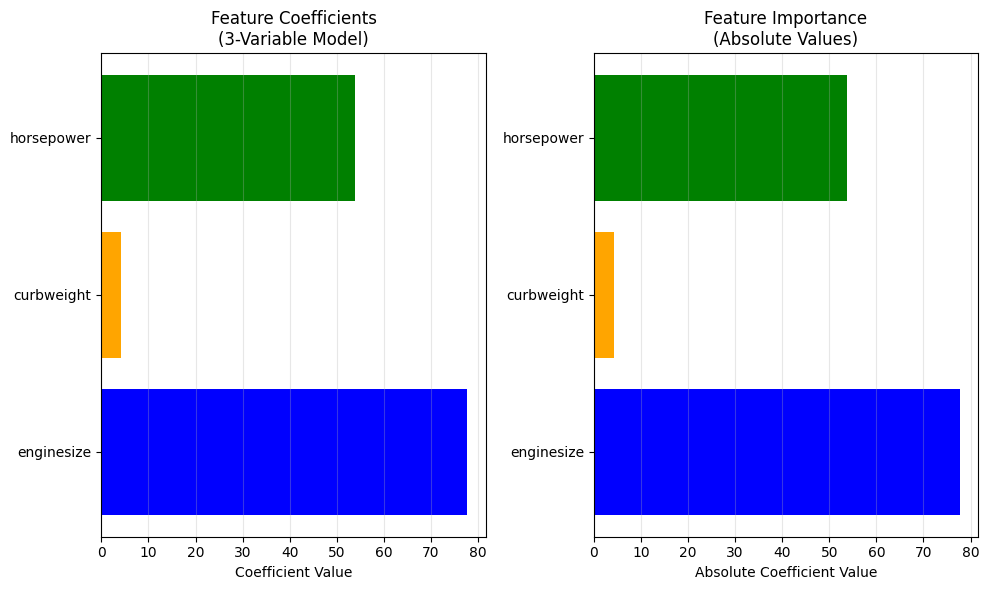

In [157]:
# Step 8: Feature Importance and Coefficient Analysis
print("="*70)
print("FEATURE IMPORTANCE ANALYSIS - 3-Variable Model")
print("="*70)

# Get feature names and coefficients
features = ['enginesize', 'curbweight', 'horsepower']
coefficients = model3.coef_
intercept = model3.intercept_

# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Coefficients (sorted by absolute importance):")
print(feature_importance.to_string(index=False))

print(f"\nModel Interpretation:")
print(f"• For every 1 unit increase in enginesize, price increases by ${coefficients[0]:,.2f}")
print(f"• For every 1 unit increase in curbweight, price increases by ${coefficients[1]:,.2f}")  
print(f"• For every 1 unit increase in horsepower, price increases by ${coefficients[2]:,.2f}")
print(f"• Base price (when all features = 0): ${intercept:,.2f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.barh(features, coefficients, color=['blue', 'orange', 'green'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients\n(3-Variable Model)')
plt.grid(axis='x', alpha=0.3)

plt.subplot(1, 2, 2)
plt.barh(features, np.abs(coefficients), color=['blue', 'orange', 'green'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance\n(Absolute Values)')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()